# 実習1-1 Titanic Dataset


In [1]:
# ライブラリの読み込み
library('tidyverse')

# mosaic() 関数を使いたいのでvcdパッケージをインストールする
# vcd: Visualizing Categorical Data
#     質的変数を分析するのに便利なパッケージ

install.packages('vcd')
library('vcd')


── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into 'C:/Users/satoc/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'vcd' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\satoc\AppData\Local\Temp\RtmpotM6g4\downloaded_packages


Loading required package: grid



In [3]:
getwd()

[1] "C:/Users/satoc/Documents/GitHub/lecture2022shimane"

## データの読み込み


In [5]:
# NAに'?'の文字が使われていることに注意する
df = read.csv('data/titanic/titanic.csv', na.string='?')

In [6]:
# データの次元の確認
df %>% dim()

[1] 1309   14

In [7]:
# 変数の表示
df %>% colnames()

[1] "pclass"    "survived"  "name"      "sex"       "age"       "sibsp"    
 [7] "parch"     "ticket"    "fare"      "cabin"     "embarked"  "boat"     
[13] "body"      "home.dest"

In [15]:
df %>% head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NA,"St Louis, MO"
2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NA,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NA,NA,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NA,135,"Montreal, PQ / Chesterville, ON"
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NA,NA,"Montreal, PQ / Chesterville, ON"
6,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NA,"New York, NY"


## 変数の確認


+ `pclass`: 旅客等級(passenger class)
    + 1: 1st(一等)
    + 2: 2nd(二等)
    + 3: 3rd(三等)


In [10]:
df$pclass %>% table(useNA='ifany')

.
  1   2   3 
323 277 709 

In [11]:
df$pclass %>% table(useNA='always')

.
   1    2    3 <NA> 
 323  277  709    0 

+ `survived`: 生存
    + 1: 生存
    + 0: 死亡


In [12]:
df$survived %>% table(useNA='ifany')

.
  0   1 
809 500 

+ `name`: 乗客の名前

In [14]:
df$name %>% head(30)

[1] "Allen, Miss. Elisabeth Walton"                    
 [2] "Allison, Master. Hudson Trevor"                   
 [3] "Allison, Miss. Helen Loraine"                     
 [4] "Allison, Mr. Hudson Joshua Creighton"             
 [5] "Allison, Mrs. Hudson J C (Bessie Waldo Daniels)"  
 [6] "Anderson, Mr. Harry"                              
 [7] "Andrews, Miss. Kornelia Theodosia"                
 [8] "Andrews, Mr. Thomas Jr"                           
 [9] "Appleton, Mrs. Edward Dale (Charlotte Lamson)"    
[10] "Artagaveytia, Mr. Ramon"                          
[11] "Astor, Col. John Jacob"                           
[12] "Astor, Mrs. John Jacob (Madeleine Talmadge Force)"
[13] "Aubart, Mme. Leontine Pauline"                    
[14] "Barber, Miss. Ellen 'Nellie'"                     
[15] "Barkworth, Mr. Algernon Henry Wilson"             
[16] "Baumann, Mr. John D"                              
[17] "Baxter, Mr. Quigg Edmond"                         
[18] "Baxter, Mrs. James (Helene DeLaudeniere Chaput)"  
[19] "Bazzani, Miss. Albina"                            
[20] "Beattie, Mr. Thomson"                             
[21] "Beckwith, Mr. Richard Leonard"                    
[22] "Beckwith, Mrs. Richard Leonard (Sallie Monypeny)" 
[23] "Behr, Mr. Karl Howell"                            
[24] "Bidois, Miss. Rosalie"                            
[25] "Bird, Miss. Ellen"                                
[26] "Birnbaum, Mr. Jakob"                              
[27] "Bishop, Mr. Dickinson H"                          
[28] "Bishop, Mrs. Dickinson H (Helen Walton)"          
[29] "Bissette, Miss. Amelia"                           
[30] "Bjornstrom-Steffansson, Mr. Mauritz Hakan"

+ `sex`: 性別


In [16]:
df$sex %>% table(useNA = 'ifany')

.
female   male 
   466    843 

+ `age`: 年齢

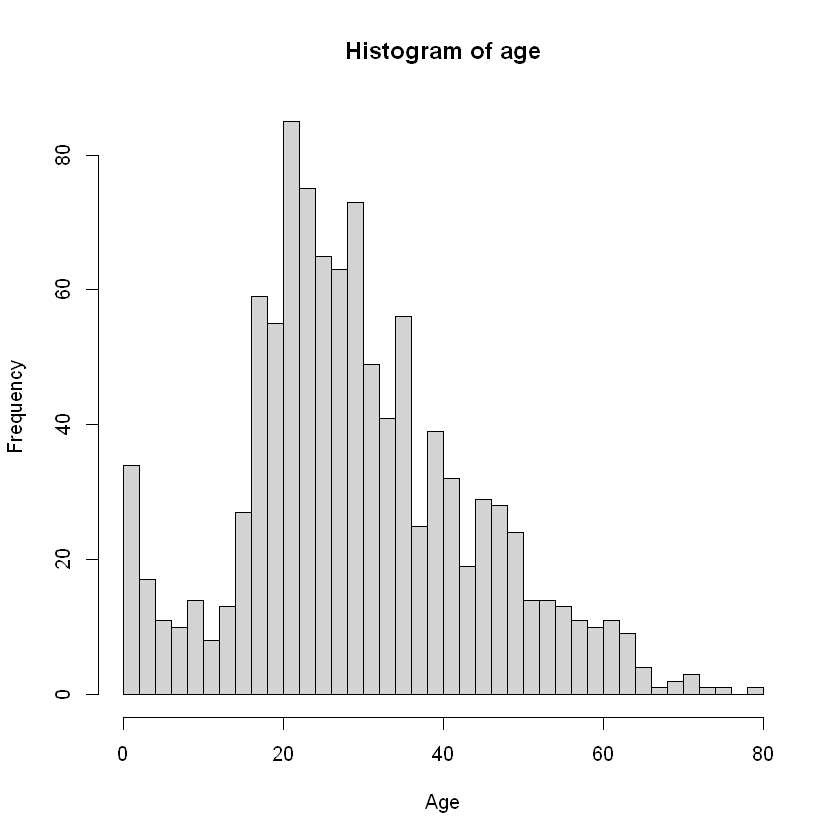

In [18]:
# hist()
# main　…図表のタイトル
# xlab …x軸ラベル
# breaks …階級の数

df$age %>% hist(
    main='Histogram of age',
    xlab='Age',
    breaks=40,
)

+ `sibsp`: 同乗していた兄弟や配偶者の数(number of siblings / spouses )


In [19]:
df$sibsp %>% table(useNA = 'ifany')

.
  0   1   2   3   4   5   8 
891 319  42  20  22   6   9 

+ `parch`: 同乗していた両親や子供の数(number of parents / children)


In [20]:
df$parch %>% table(useNA = 'ifany')

.
   0    1    2    3    4    5    6    9 
1002  170  113    8    6    6    2    2 

+ `ticket`: チケット番号

In [21]:
df$ticket %>% head(30)

[1] "24160"    "113781"   "113781"   "113781"   "113781"   "19952"   
 [7] "13502"    "112050"   "11769"    "PC 17609" "PC 17757" "PC 17757"
[13] "PC 17477" "19877"    "27042"    "PC 17318" "PC 17558" "PC 17558"
[19] "11813"    "13050"    "11751"    "11751"    "111369"   "PC 17757"
[25] "PC 17483" "13905"    "11967"    "11967"    "PC 17760" "110564"

+ `fare`: 運賃

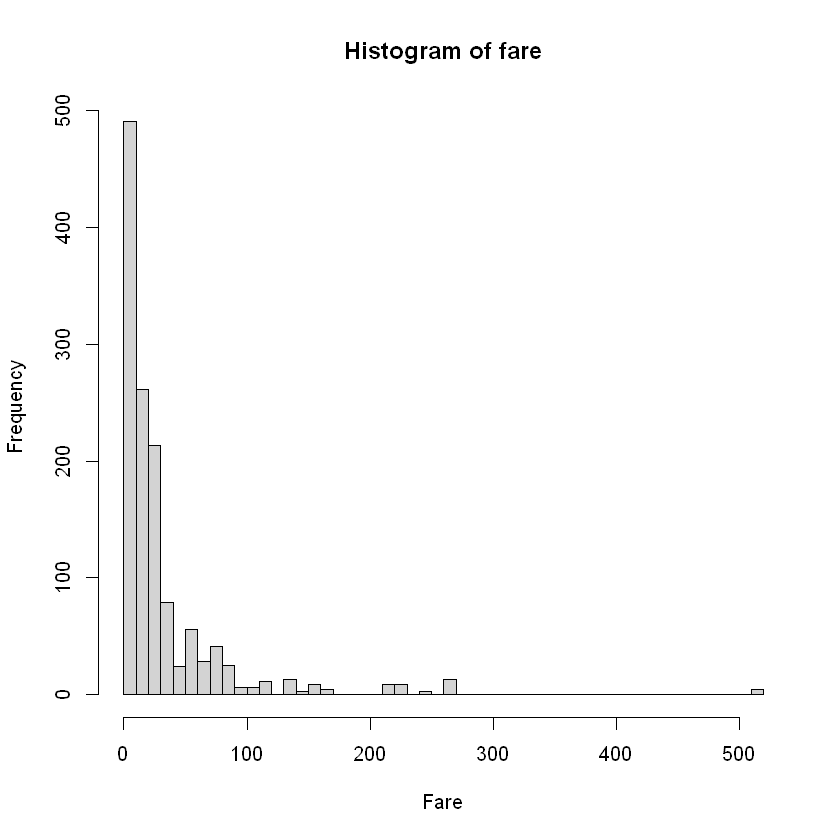

In [23]:
df$fare %>% hist(
    main='Histogram of fare',
    xlab='Fare',
    breaks=40,
)

+ `cabin`: 客室番号

In [24]:
df$cabin %>% head(30)

[1] "B5"      "C22 C26" "C22 C26" "C22 C26" "C22 C26" "E12"     "D7"     
 [8] "A36"     "C101"    NA        "C62 C64" "C62 C64" "B35"     NA       
[15] "A23"     NA        "B58 B60" "B58 B60" "D15"     "C6"      "D35"    
[22] "D35"     "C148"    NA        "C97"     NA        "B49"     "B49"    
[29] "C99"     "C52"

+ `embarked`:出港地 
    + C: Cherbourg
    + Q: Queenstown
    + S: Southampton


In [25]:
df$embarked %>% table(useNA='ifany')

.
   C    Q    S <NA> 
 270  123  914    2 

+ `boat`: 救命ボートの番号


In [27]:
df$boat %>% table(useNA='ifany')

.
      1      10      11      12      13   13 15 13 15 B      14      15   15 16 
      5      29      25      19      39       2       1      33      37       1 
     16       2       3       4       5     5 7     5 9       6       7       8 
     23      13      26      31      27       2       1      20      23      23 
   8 10       9       A       B       C     C D       D    <NA> 
      1      25      11       9      38       2      20     823 

In [28]:
df$boat %>% is.na() %>% table()

.
FALSE  TRUE 
  486   823 

+ `body`: 遺体収容時の識別番号

In [29]:
df$body %>% table(useNA='ifany')

.
   1    4    7    9   14   15   16   17   18   19   22   32   35   37   38   43 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
  45   46   47   50   51   52   53   58   61   62   67   68   69   70   72   75 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
  79   80   81   89   96   97   98  101  103  108  109  110  119  120  121  122 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 124  126  130  131  133  135  142  143  147  148  149  153  155  156  165  166 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 169  171  172  173  174  175  176  181  187  188  189  190  196  197  201  206 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 207  208  209  230  232  234  236  245  249  255  256  258  259  260  261  263 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 269  271  275  283  284  

In [30]:
df$body %>% is.na() %>% table()

.
FALSE  TRUE 
  121  1188 

+ `home.dest`: 自宅または目的地

In [31]:
df$home.dest %>% head(30)

[1] "St Louis, MO"                       "Montreal, PQ / Chesterville, ON"   
 [3] "Montreal, PQ / Chesterville, ON"    "Montreal, PQ / Chesterville, ON"   
 [5] "Montreal, PQ / Chesterville, ON"    "New York, NY"                      
 [7] "Hudson, NY"                         "Belfast, NI"                       
 [9] "Bayside, Queens, NY"                "Montevideo, Uruguay"               
[11] "New York, NY"                       "New York, NY"                      
[13] "Paris, France"                      NA                                  
[15] "Hessle, Yorks"                      "New York, NY"                      
[17] "Montreal, PQ"                       "Montreal, PQ"                      
[19] NA                                   "Winnipeg, MN"                      
[21] "New York, NY"                       "New York, NY"                      
[23] "New York, NY"                       NA                                  
[25] NA                                   "San Francisco, CA"                 
[27] "Dowagiac, MI"                       "Dowagiac, MI"                      
[29] NA                                   "Stockholm, Sweden / Washington, DC"

## ２変数の記述統計

+ 「何が生存につながったのか」を検討するために各変数と生存との関係性をみていく

### 質的変数×質的変数

+ 性別(2値)×生存(2値)のような質的変数同士の関連を見て行く
    + クロス表/分割表
        + $ \chi ^ 2 $ 検定: 独立性の検定ができる
        + 連関の指標
    + モザイクプロット
        + クロス表を積み上げグラフとして図示
        + 面積が各セルに比例


In [34]:
# 分割表
x = df[c('pclass', 'survived')] %>% table()
print(x)

      survived
pclass   0   1
     1 123 200
     2 158 119
     3 528 181


In [35]:
# カイ二乗検定
chisq.test(x)


	Pearson's Chi-squared test

data:  x
X-squared = 127.86, df = 2, p-value < 2.2e-16


In [36]:
# 連関の指標をを出す関数
# vcdに入っている
assocstats(x)

                    X^2 df P(> X^2)
Likelihood Ratio 127.77  2        0
Pearson          127.86  2        0

Phi-Coefficient   : NA 
Contingency Coeff.: 0.298 
Cramer's V        : 0.313 

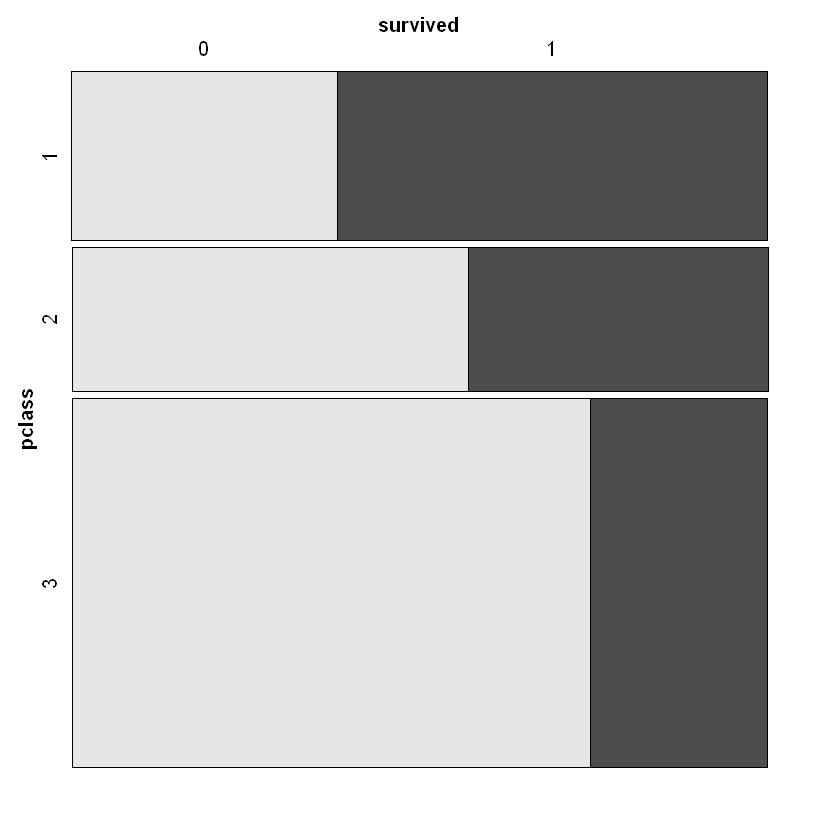

In [37]:
# モザイクプロット (vcd)
mosaic(survived ~ pclass, data=df)

In [38]:
# 表示用の関数を作る

show_association = function(data){
    # クロス表を得る
    x = data %>% table()
    # カイ二乗検定をする
    result = chisq.test(x)
    print(x)
    print(result)
    # 連関の指標を出す
    print(assocstats(x))
}

      survived
pclass   0   1
     1 123 200
     2 158 119
     3 528 181

	Pearson's Chi-squared test

data:  x
X-squared = 127.86, df = 2, p-value < 2.2e-16

                    X^2 df P(> X^2)
Likelihood Ratio 127.77  2        0
Pearson          127.86  2        0

Phi-Coefficient   : NA 
Contingency Coeff.: 0.298 
Cramer's V        : 0.313 


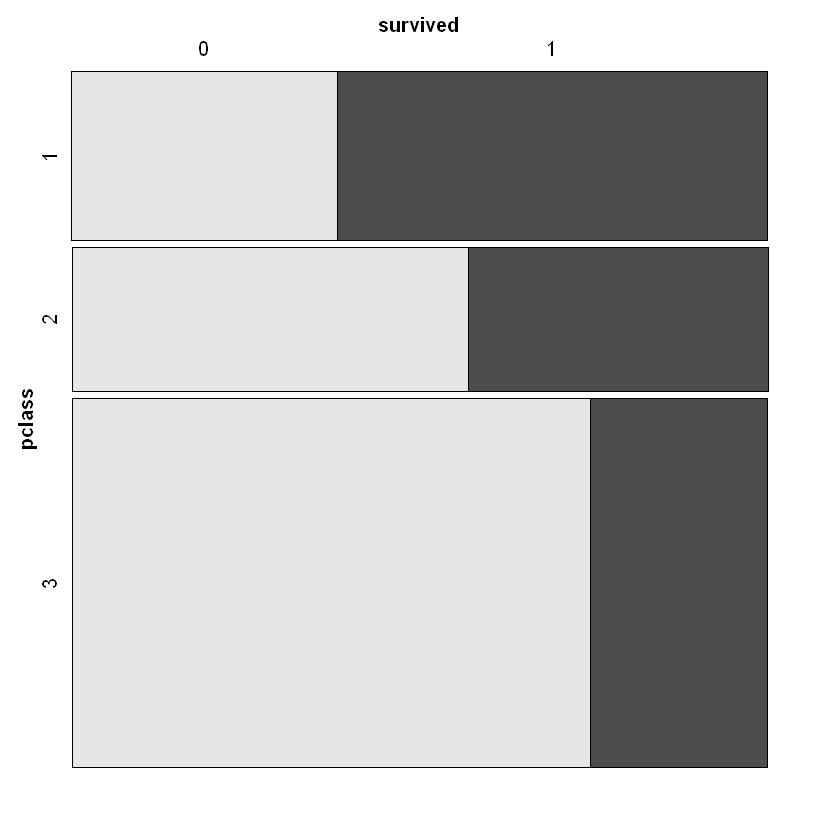

In [40]:
# 旅客等級
show_association(df[c('pclass', 'survived')])
mosaic(survived ~ pclass, data=df)

        survived
sex        0   1
  female 127 339
  male   682 161

	Pearson's Chi-squared test with Yates' continuity correction

data:  x
X-squared = 363.62, df = 1, p-value < 2.2e-16

                    X^2 df P(> X^2)
Likelihood Ratio 372.92  1        0
Pearson          365.89  1        0

Phi-Coefficient   : 0.529 
Contingency Coeff.: 0.467 
Cramer's V        : 0.529 


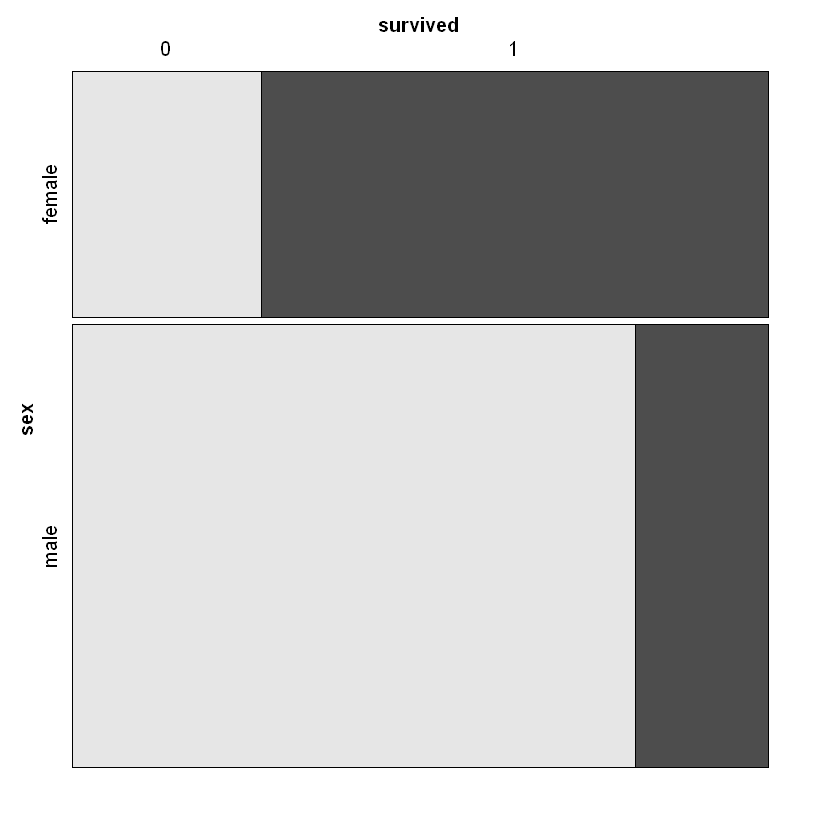

In [41]:
# 性別
show_association(df[c('sex', 'survived')])
mosaic(survived ~ sex, data=df)

In [42]:
# 兄弟/配偶者
df %>% select(sibsp, survived) %>% table()

     survived
sibsp   0   1
    0 582 309
    1 156 163
    2  23  19
    3  14   6
    4  19   3
    5   6   0
    8   9   0

In [44]:
# 変数を合成
df$sibsp_combined = ifelse(df$sibsp >= 3, 3, df$sibsp)

              survived
sibsp_combined   0   1
             0 582 309
             1 156 163
             2  23  19
             3  48   9

	Pearson's Chi-squared test

data:  x
X-squared = 40.161, df = 3, p-value = 9.849e-09

                    X^2 df   P(> X^2)
Likelihood Ratio 41.204  3 5.9205e-09
Pearson          40.161  3 9.8488e-09

Phi-Coefficient   : NA 
Contingency Coeff.: 0.173 
Cramer's V        : 0.175 


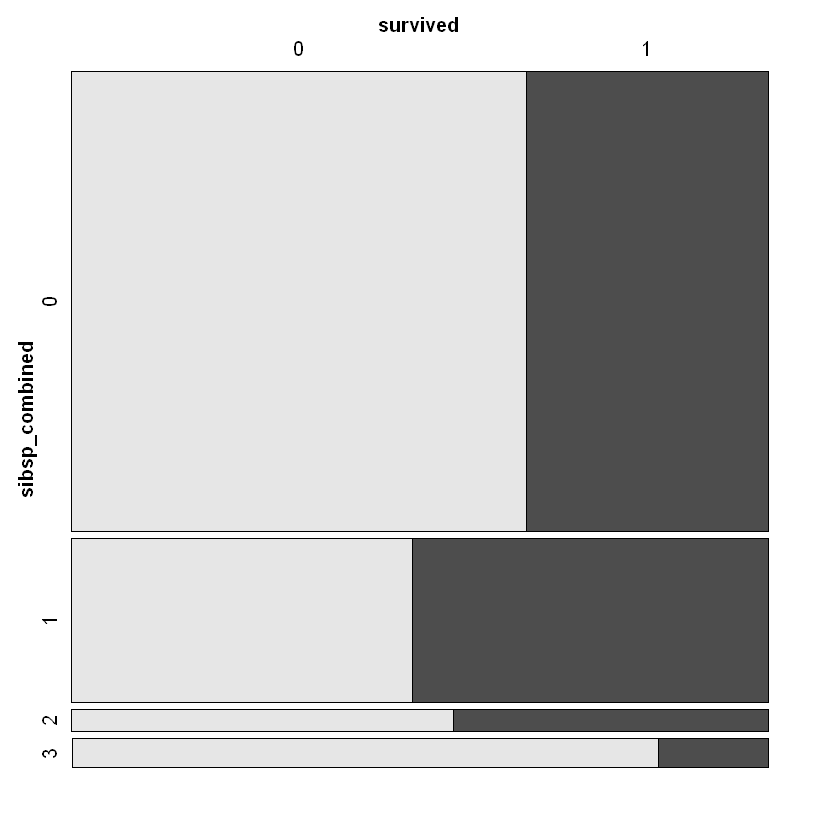

In [46]:
show_association(df[c('sibsp_combined', 'survived')])
mosaic(survived ~ sibsp_combined, data=df)

In [47]:
# 両親/子供
df %>% select(parch, survived) %>% table()

     survived
parch   0   1
    0 666 336
    1  70 100
    2  56  57
    3   3   5
    4   5   1
    5   5   1
    6   2   0
    9   2   0

In [48]:
df$parch_combined = ifelse(df$parch >= 3, 3, df$parch)

In [49]:
df$parch_combined %>% table()

.
   0    1    2    3 
1002  170  113   24 

              survived
parch_combined   0   1
             0 666 336
             1  70 100
             2  56  57
             3  17   7

	Pearson's Chi-squared test

data:  x
X-squared = 47.878, df = 3, p-value = 2.26e-10

                    X^2 df   P(> X^2)
Likelihood Ratio 46.730  3 3.9665e-10
Pearson          47.878  3 2.2604e-10

Phi-Coefficient   : NA 
Contingency Coeff.: 0.188 
Cramer's V        : 0.191 


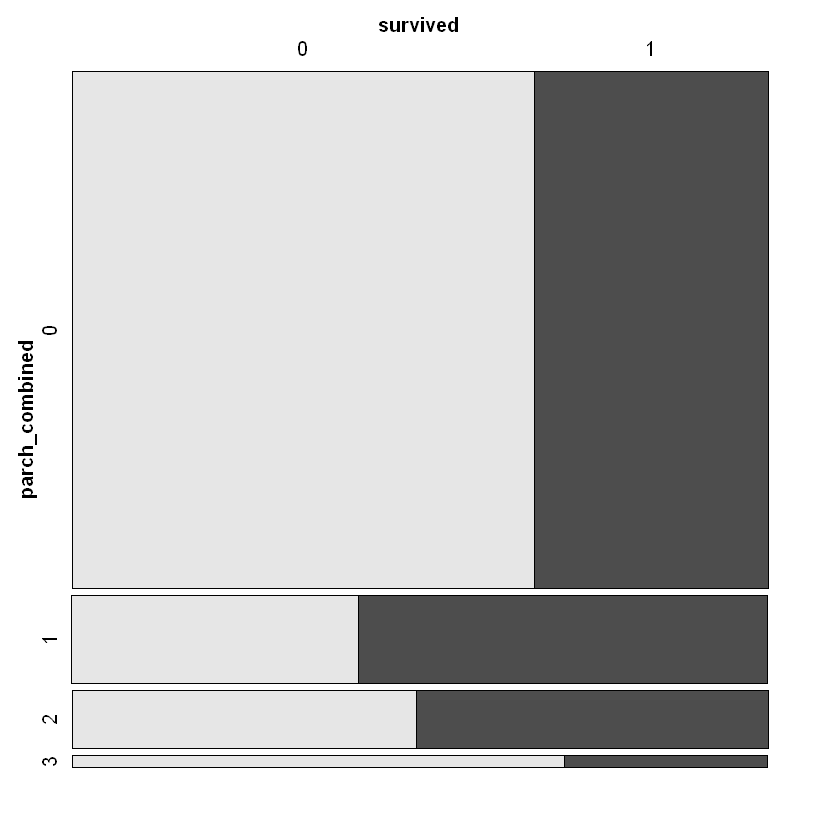

In [50]:
show_association(df[c('parch_combined', 'survived')])
mosaic(survived ~ parch_combined, data=df)

        survived
embarked   0   1
       C 120 150
       Q  79  44
       S 610 304

	Pearson's Chi-squared test

data:  x
X-squared = 44.242, df = 2, p-value = 2.472e-10

                    X^2 df   P(> X^2)
Likelihood Ratio 43.173  2 4.2177e-10
Pearson          44.242  2 2.4719e-10

Phi-Coefficient   : NA 
Contingency Coeff.: 0.181 
Cramer's V        : 0.184 


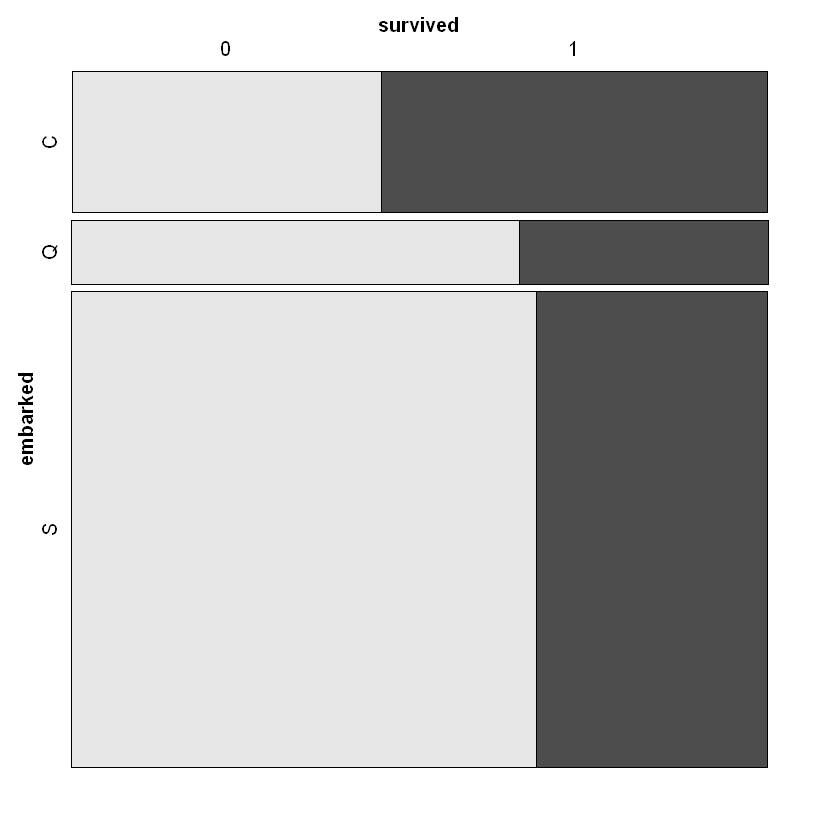

In [51]:
# 出港地
show_association(df[c('embarked', 'survived')])
mosaic(survived ~ embarked, data=df)

        pclass
embarked   1   2   3
       C 141  28 101
       Q   3   7 113
       S 177 242 495

	Pearson's Chi-squared test

data:  x
X-squared = 205.79, df = 4, p-value < 2.2e-16

                    X^2 df P(> X^2)
Likelihood Ratio 206.42  4        0
Pearson          205.79  4        0

Phi-Coefficient   : NA 
Contingency Coeff.: 0.369 
Cramer's V        : 0.281 


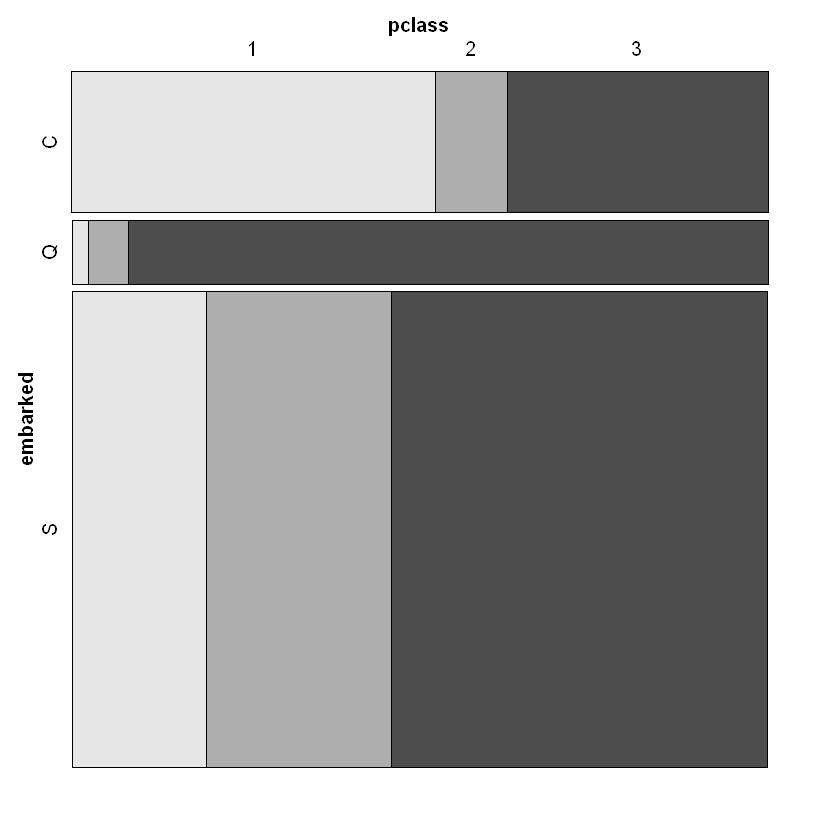

In [52]:
show_association(df[c('embarked', 'pclass')])
mosaic(pclass ~ embarked, data=df)

        sex
embarked female male
       C    113  157
       Q     60   63
       S    291  623

	Pearson's Chi-squared test

data:  x
X-squared = 19.584, df = 2, p-value = 5.589e-05

                    X^2 df   P(> X^2)
Likelihood Ratio 19.178  2 6.8487e-05
Pearson          19.584  2 5.5891e-05

Phi-Coefficient   : NA 
Contingency Coeff.: 0.122 
Cramer's V        : 0.122 


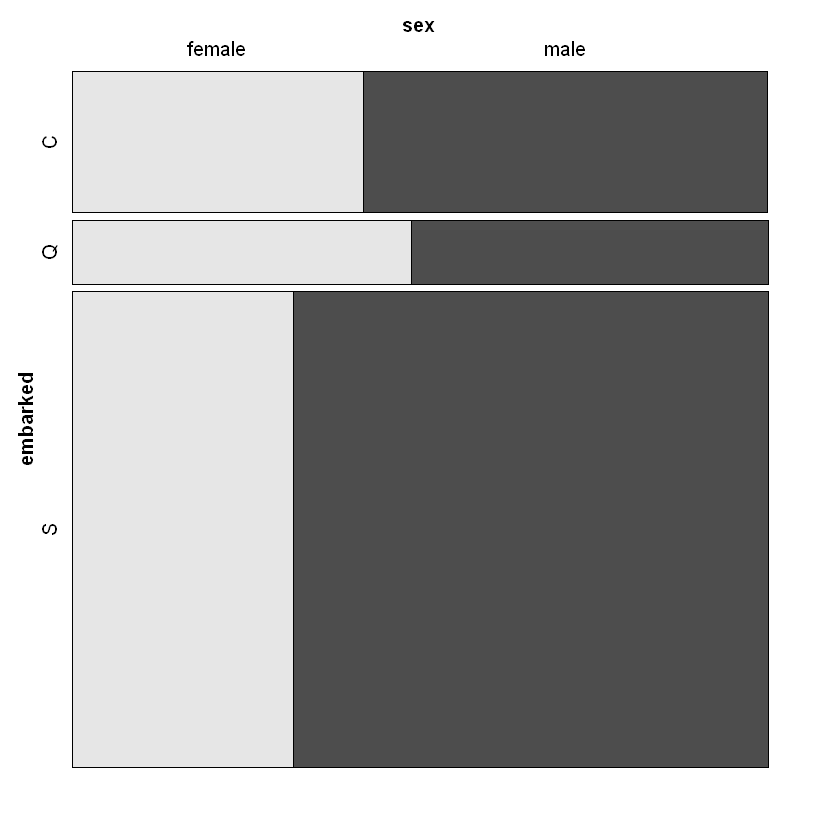

In [53]:
show_association(df[c('embarked', 'sex')])
mosaic(sex ~ embarked, data=df)

In [ ]:
# 救命ボート

In [54]:
df$boat %>% is.na() %>% table()

.
FALSE  TRUE 
  486   823 

In [56]:
df$is_on_boat = ! is.na(df$boat)

In [57]:
df$is_on_boat %>% table()

.
FALSE  TRUE 
  823   486 

          survived
is_on_boat   0   1
     FALSE 800  23
     TRUE    9 477

	Pearson's Chi-squared test with Yates' continuity correction

data:  x
X-squared = 1172.8, df = 1, p-value < 2.2e-16

                    X^2 df P(> X^2)
Likelihood Ratio 1441.5  1        0
Pearson          1176.9  1        0

Phi-Coefficient   : 0.948 
Contingency Coeff.: 0.688 
Cramer's V        : 0.948 


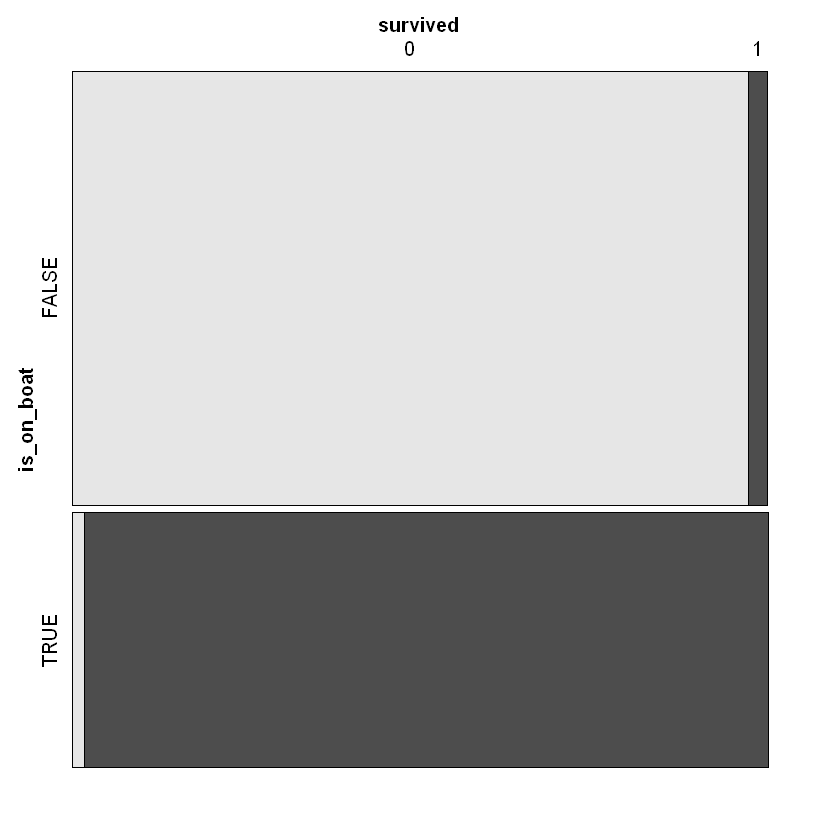

In [58]:
show_association(df[c('is_on_boat', 'survived')])
mosaic(survived ~ is_on_boat, data=df)

### 量的変数×質的変数


#### 箱ひげ図

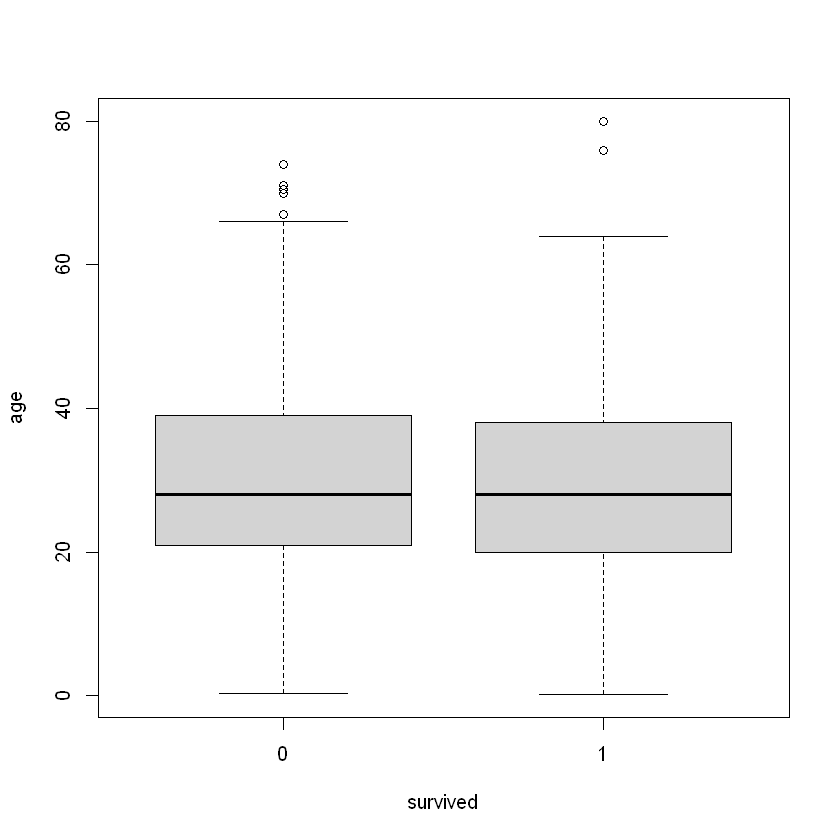

In [59]:
# 年齢
boxplot(age ~ survived, data=df)

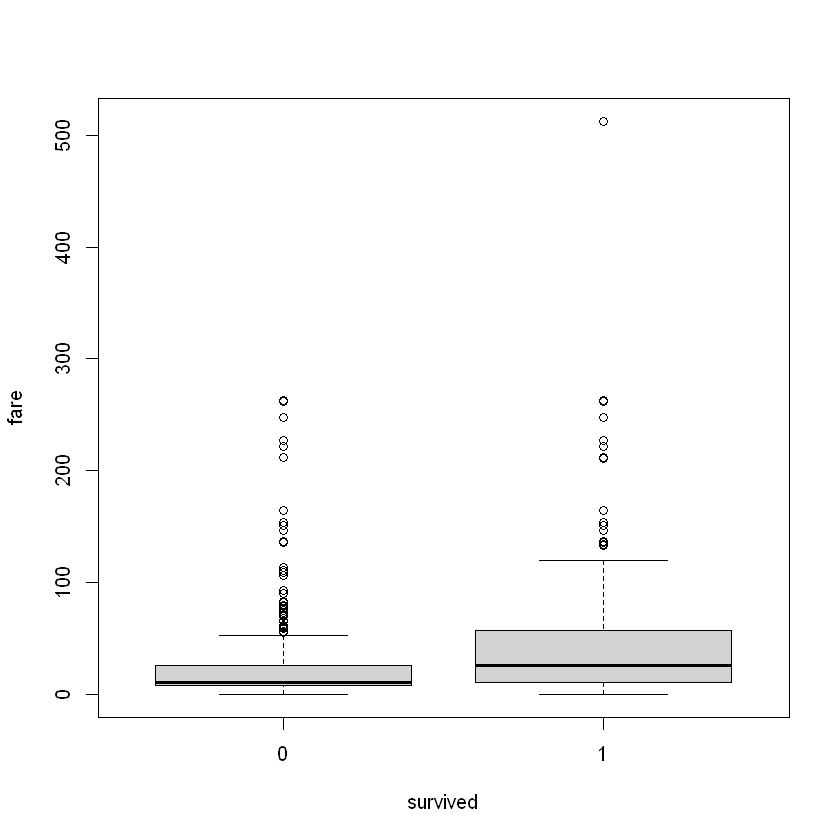

In [60]:
# 運賃
boxplot(fare ~ survived, data=df)

In [62]:
# ヒストグラムの比較
dead = df %>% filter(survived==0)
alive = df %>% filter(survived==1)


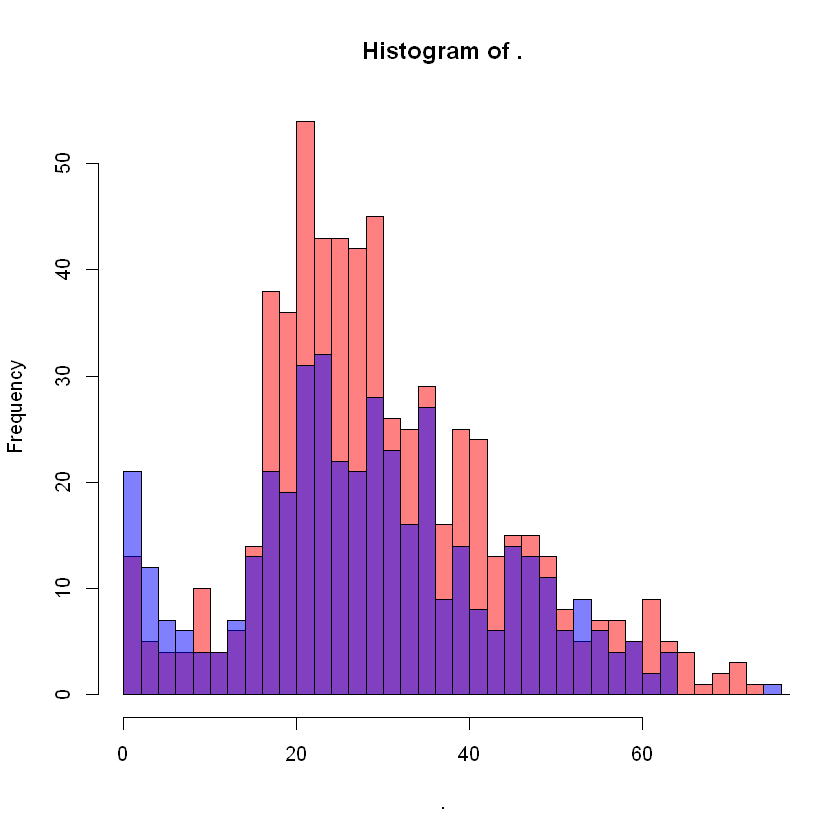

In [65]:
# 年齢
dead$age %>% hist(col='#FF00007f', breaks=40)
alive$age %>% hist(col='#0000FF7f', breaks=40, add=T)

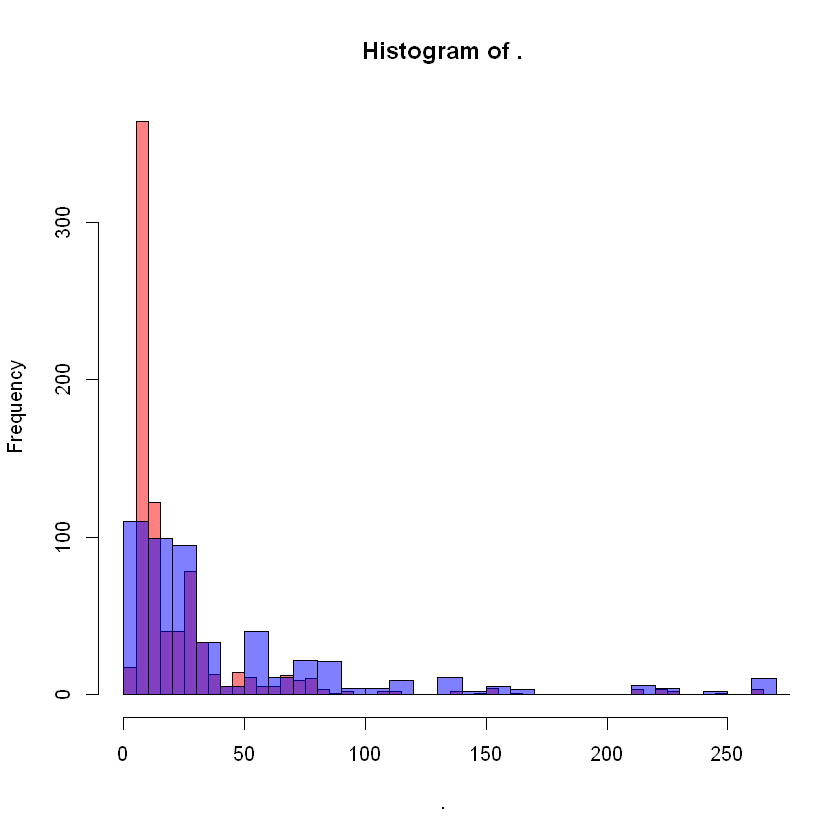

In [66]:
# 運賃
dead$fare %>% hist(col='#FF00007f', breaks=40)
alive$fare %>% hist(col='#0000FF7f', breaks=40, add=T)

,fare,age
fare,1.0000000,0.1787393
age,0.1787393,1.0000000


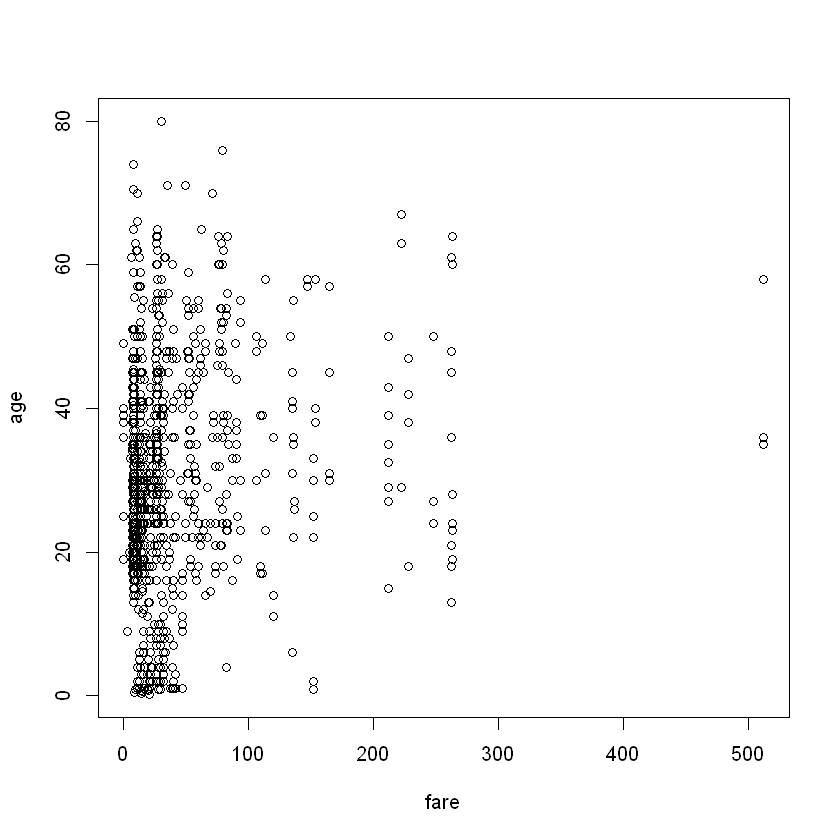

In [68]:
# 散布図
df %>% select(fare, age) %>% plot()
df %>% select(fare, age) %>% cor(use='pairwise')

## ３変数以上の解析

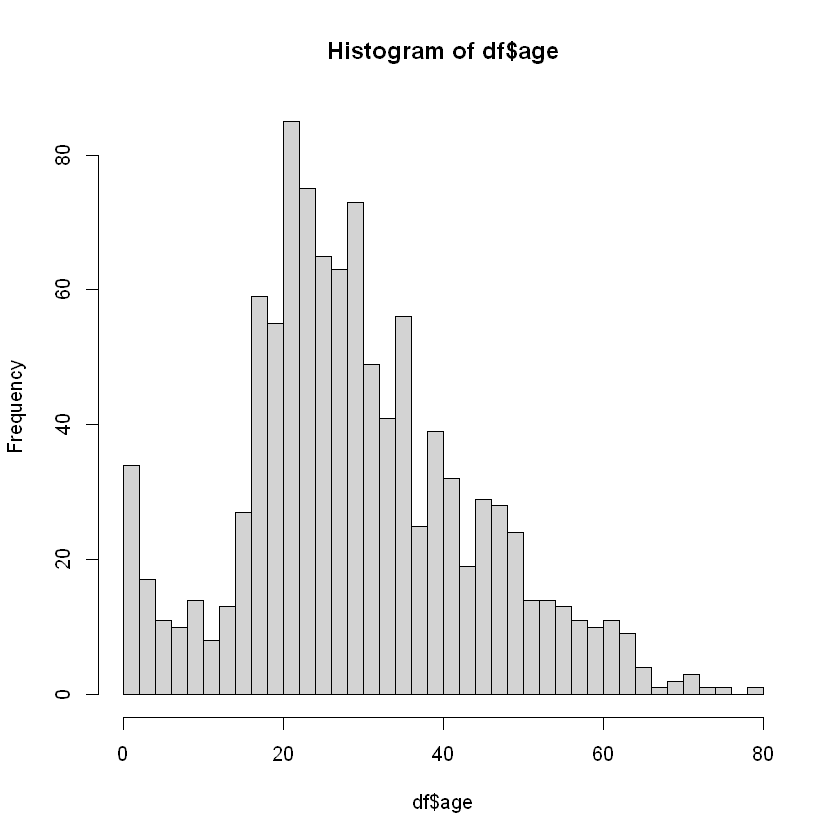

In [69]:
# 年齢の層別解析
hist(df$age, breaks=40)

In [70]:
df$age_strata =cut(
    df$age,
    breaks=c(0, 10, 20, 30, 40, 50, 60, 100),
    c('0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-'),
    right=F, #以下にするか未満にするか
    include.lowest=T
    )
    

In [71]:
df$age_strata %>% table()

.
  0-9 10-19 20-29 30-39 40-49 50-59   60- 
   82   143   344   232   135    70    40 

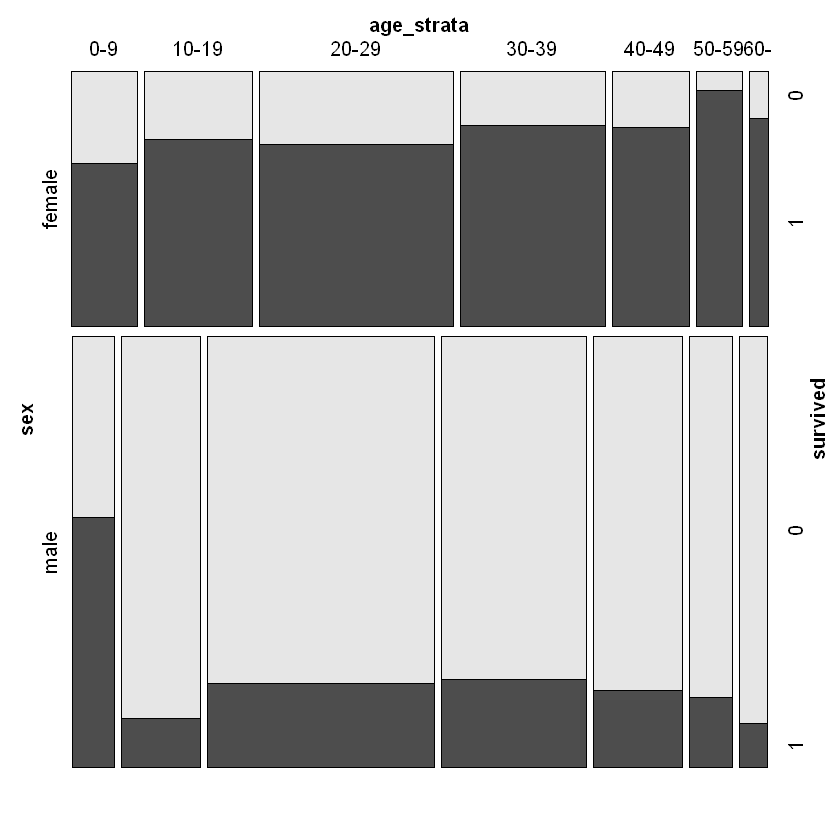

In [72]:
mosaic(survived ~ age_strata|sex, data=df)


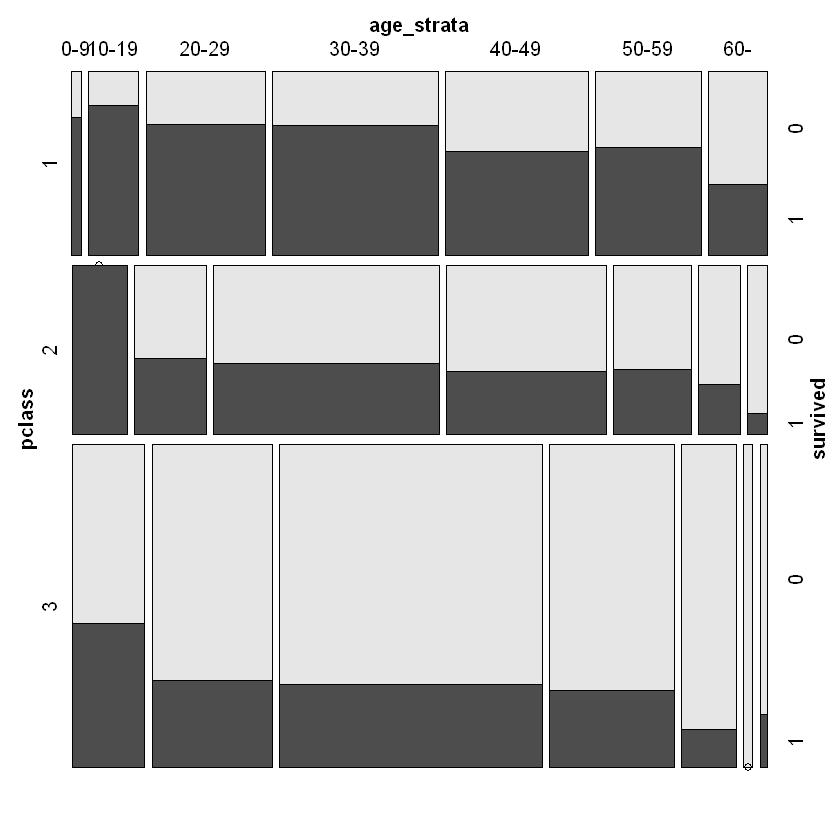

In [73]:
mosaic(survived ~ age_strata|pclass, data=df)

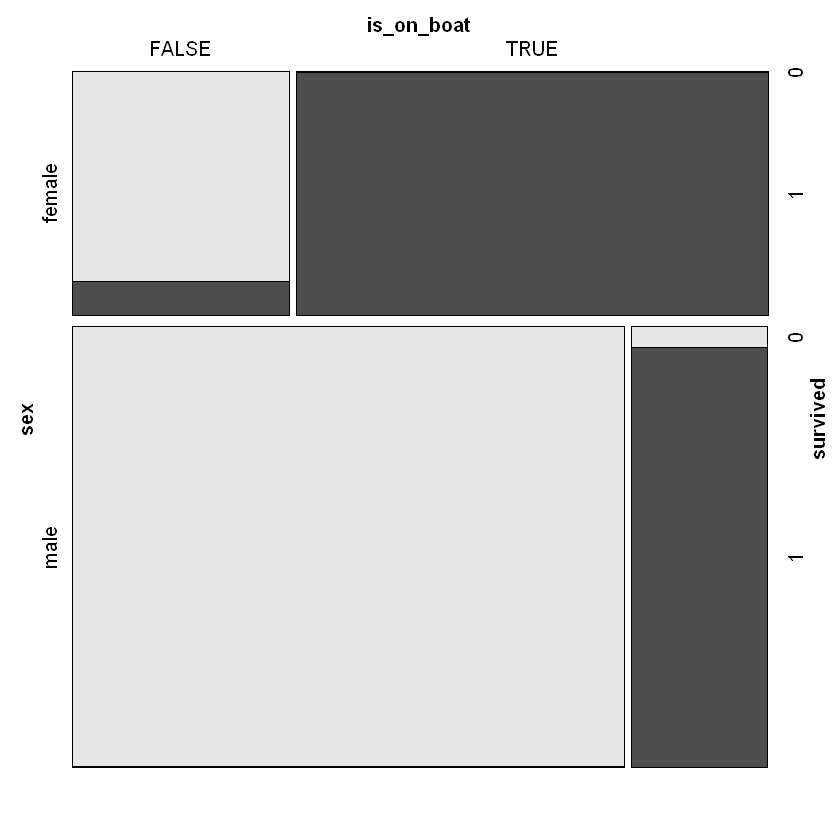

In [74]:
# 救命ボートに乗れたか
# 性別
mosaic(survived ~ is_on_boat|sex, data=df)

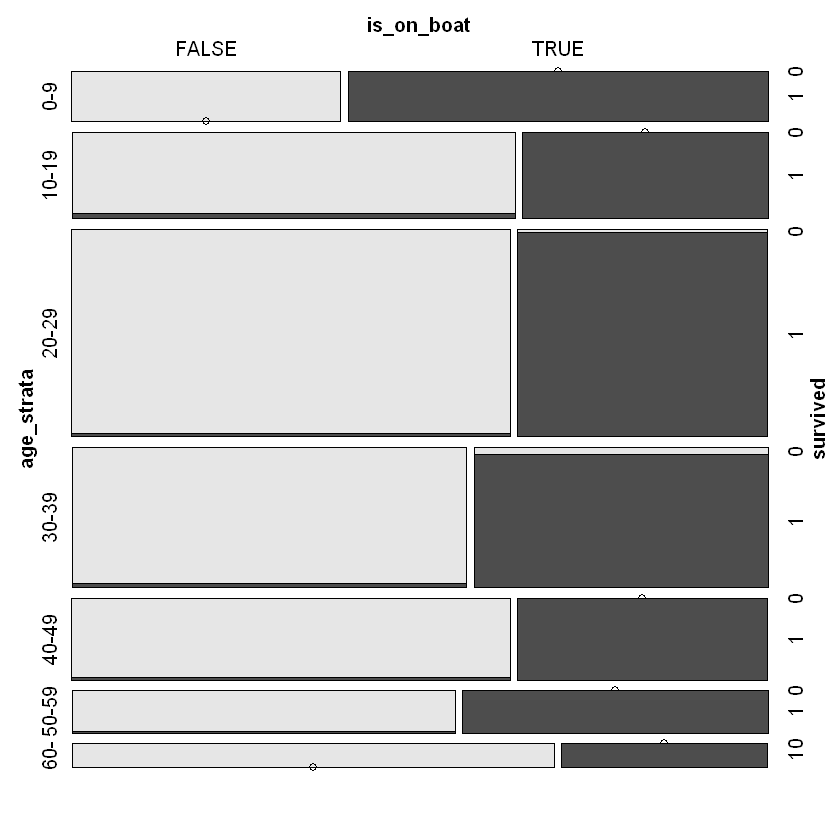

In [75]:
mosaic(survived ~ is_on_boat|age_strata, data=df)

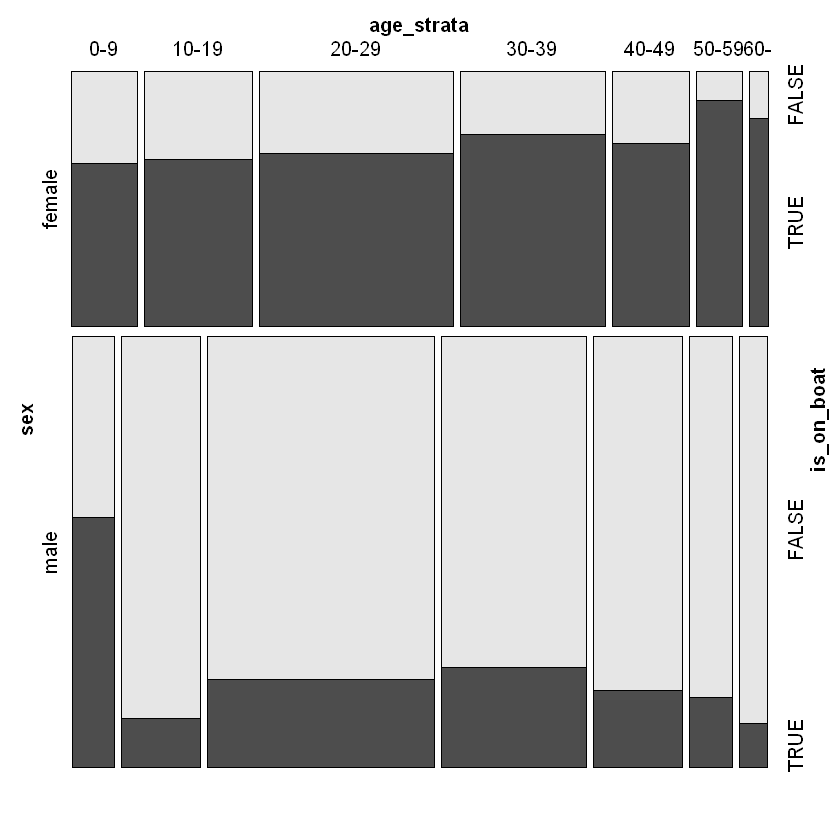

In [77]:
mosaic(is_on_boat ~ age_strata|sex, data=df)

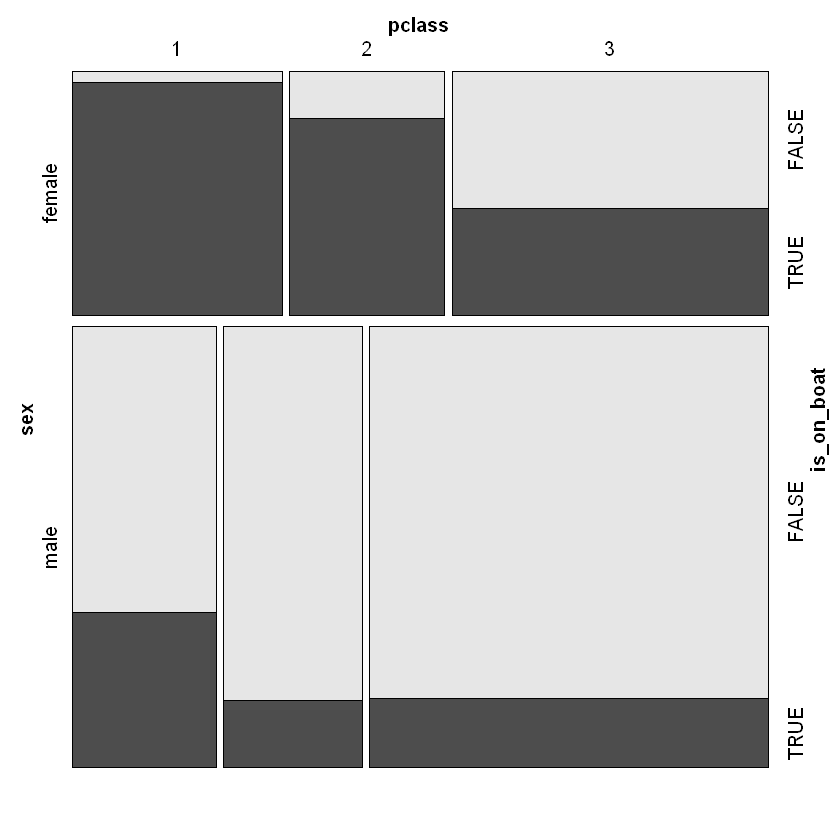

In [78]:
mosaic(is_on_boat ~ pclass|sex, data=df)

In [80]:
# 回帰モデル(ロジスティック回帰)

df$pclass = as.factor(df$pclass)

model = glm(survived ~ sex + age + pclass + embarked, data=df, family='binomial')
summary(model)


Call:
glm(formula = survived ~ sex + age + pclass + embarked, family = "binomial", 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5181  -0.6773  -0.4274   0.6662   2.4550  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.909651   0.353268  11.067  < 2e-16 ***
sexmale     -2.535693   0.169860 -14.928  < 2e-16 ***
age         -0.033273   0.006415  -5.186 2.14e-07 ***
pclass2     -1.018493   0.238766  -4.266 1.99e-05 ***
pclass3     -1.998954   0.235921  -8.473  < 2e-16 ***
embarkedQ   -1.373361   0.432607  -3.175 0.001500 ** 
embarkedS   -0.715683   0.211242  -3.388 0.000704 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1411.0  on 1043  degrees of freedom
Residual deviance:  966.3  on 1037  degrees of freedom
  (265 observations deleted due to missingness)
AIC: 980.3

Number of Fisher Scoring iterations: 4
